## Observations and Insights

* Sample data is clean - no null or misisng values found.
 * Sample data used for treatment regimens study represents fair % of female (49.4%) and male (50.6%) mice.  
 * There is a strong linear correlation between mouse weight and average tumor volume for the Capomulin regimen. As mouse tumor volume increase, mouse weight also increase.
 * Only Infubinol has one data point that is an outlier. For top four drug regimes tumor volume spread is well within IQR.
 * At the final time point, mouse Tumor Volume is lower than before treatment of Capomulin Drug.

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = os.path.join("","data","Mouse_metadata.csv")
study_results = os.path.join("","data","Study_results.csv")

# Read the mouse data and the study results|
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [2]:
# Combine the data into a single dataset and verify result
mouse_study_Results = pd.merge(mouse_metadata,study_results, on="Mouse ID")
mouse_study_Results.head(2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0


In [3]:
#Check for null values - every column has equal records (1893)
mouse_study_Results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
Mouse ID              1893 non-null object
Drug Regimen          1893 non-null object
Sex                   1893 non-null object
Age_months            1893 non-null int64
Weight (g)            1893 non-null int64
Timepoint             1893 non-null int64
Tumor Volume (mm3)    1893 non-null float64
Metastatic Sites      1893 non-null int64
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


## Summary statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_mean = mouse_study_Results.groupby("Drug Regimen").mean() ["Tumor Volume (mm3)"]
tumor_median = mouse_study_Results.groupby("Drug Regimen").median() ["Tumor Volume (mm3)"]
tumor_variance = mouse_study_Results.groupby("Drug Regimen").var() ["Tumor Volume (mm3)"]
tumor_std =mouse_study_Results.groupby("Drug Regimen").std() ["Tumor Volume (mm3)"]
tumor_sem = mouse_study_Results.groupby("Drug Regimen").sem() ["Tumor Volume (mm3)"]

In [5]:
#Build Data Frame for tumor volume
tumor_stats_summary = pd.DataFrame({"Mean": tumor_mean,"Median": tumor_median,
                                    "Variance ":tumor_variance,
                                    "Standard Deviation": tumor_std,
                                    "SEM":tumor_sem})

In [6]:
#Statistics summary table of mean, median, variance, standard deviation, and SEM of the tumor volume 
tumor_stats_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

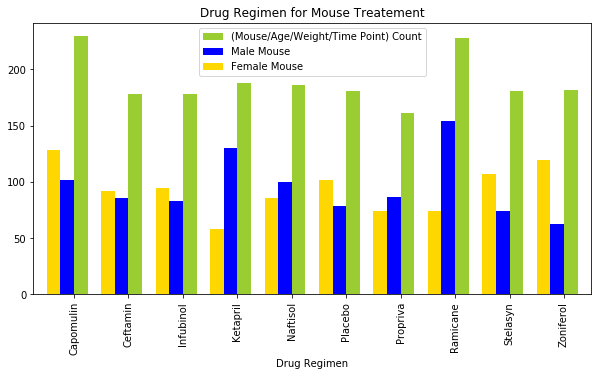

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

#Groupby drug regimen
regimen_data_points = mouse_study_Results.groupby(["Drug Regimen"]).count() ["Mouse ID"]

#Get additiponal data points - # of Male and Female Mouse
male_count =mouse_study_Results["Sex"]=="Male"
female_count =mouse_study_Results["Sex"]=="Female"
regimen_data_points2 = mouse_study_Results[male_count].groupby(["Drug Regimen"]).count() ["Sex"]
regimen_data_points3 = mouse_study_Results[female_count].groupby(["Drug Regimen"]).count() ["Sex"]

#Set fig size
fig = plt.figure(figsize=(10,5)) 

#Set labels
label=["(Mouse/Age/Weight/Time Point) Count","Male Mouse","Female Mouse"]

#Use DF 
regimen_data_points.plot(kind='bar', color='yellowgreen', position=0, width=0.25)
regimen_data_points2.plot(kind='bar', color='blue', position=1, width=0.25)
regimen_data_points3.plot(kind='bar', color='gold',position=2, width=0.25)
plt.xlim(-0.75, 9.5)
plt.title("Drug Regimen for Mouse Treatement")
plt.legend(labels=label)

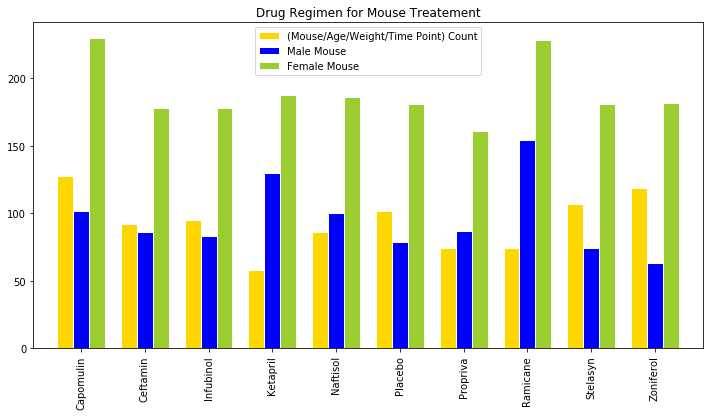

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

#Build x axis
x_axis=[]
[x_axis.append(item) for item in regimen_data_points.index]
     
#Build y axis -set height of bar
y_axis=[]
y1_axis=[]
y2_axis=[]
[y_axis.append(int(item))for item in regimen_data_points]
[y1_axis.append(int(item))for item in regimen_data_points2]
[y2_axis.append(int(item))for item in regimen_data_points3]

# set width of bar
barWidth = 0.25
 
# Set position of bar on X axis
x1 = np.arange(10)
x2 = [x + barWidth for x in x1]
x3 = [x + barWidth for x in x2]
 
# Make the plot
plt.figure(figsize=(12,6))
plt.bar(x1, y2_axis, color='gold', width=barWidth, edgecolor='white', label='(Mouse/Age/Weight/Time Point) Count')
plt.bar(x2, y1_axis, color='blue', width=barWidth, edgecolor='white', label='Male Mouse')
plt.bar(x3, y_axis, color='yellowgreen', width=barWidth, edgecolor='white', label='Female Mouse')

# Add xticks on the middle of the group bars
plt.title("Drug Regimen for Mouse Treatement")
plt.xlim(-.5, 10)
plt.xticks([r + barWidth for r in range(len(x1))], x_axis, rotation='vertical')
 
# Create legend & Show graphic
plt.legend()
plt.show()

## Pie plots

Text(0.5, 1.0, '% Distribution of Male ~ Female Mice')

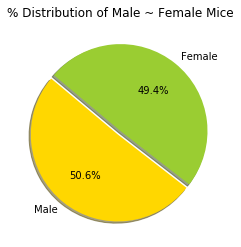

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Data to plot
labels = 'Male', 'Female'
sex_count = mouse_study_Results["Sex"].value_counts()
colors = ['gold', 'yellowgreen']
explode = (0.05, 0)  # explode 1st slice

# Plot the pie chart
piplot =sex_count.plot(kind="pie",explode=explode, labels=labels, 
                       colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
piplot.set_xlabel("")
piplot.set_ylabel("")
piplot.set_title("% Distribution of Male ~ Female Mice")

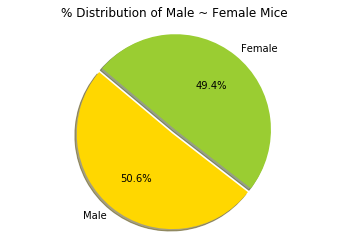

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Data to plot
labels = 'Male', 'Female'
sex_count = mouse_study_Results["Sex"].value_counts()
colors = ['gold', 'yellowgreen']
explode = (0.05, 0)  # explode 1st slice

# Plot the pie chart
plt.title("% Distribution of Male ~ Female Mice")
plt.pie(sex_count, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

## Quartiles, outliers and boxplots

In [11]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [12]:
#Step 1: Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
#Pick four promsiing treatment regimes -  ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
#Extract the top four promsing treatment regimess
top_regimes = mouse_study_Results[mouse_study_Results["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

#Get last volume measurement for each selected  mouse ID andregimes 
top_regimes_final_volume = top_regimes.groupby(["Drug Regimen","Mouse ID"]).tail(1)
top_regimes_final_volume.head(2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


(10, 80)

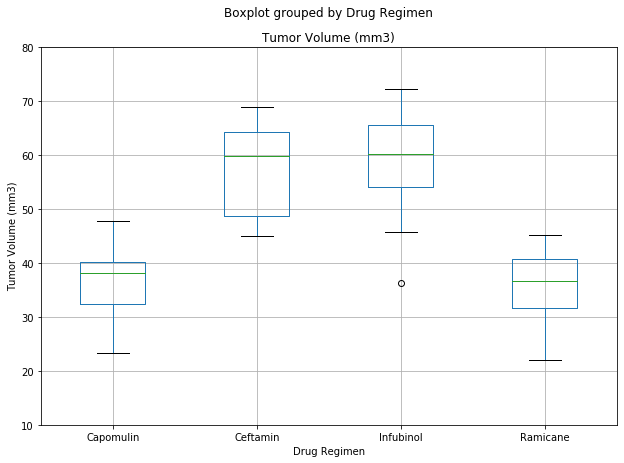

In [13]:
#Draw box plot using data frame
plt_box =top_regimes_final_volume.boxplot(by="Drug Regimen",column =["Tumor Volume (mm3)"], grid = True,figsize=(10,7))
plt_box.set_ylabel("Tumor Volume (mm3)")
plt_box.set_ylim(10,80) #Setting to check if there are any outliers

**From the boxplot, for top four drug regimes only "Infubinol" drug has one data point that is an outlier. Rest of the data points shows that tumor volume spread is well within IQR**

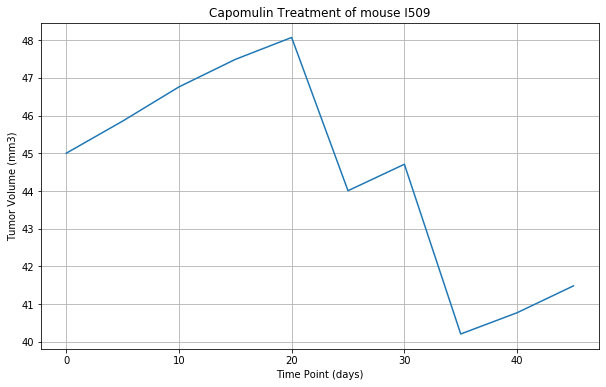

In [14]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#capomulinn_plot= mouse_study_Results[mouse_study_Results["Drug Regimen"]=="Capomulin"]
regimen=mouse_study_Results["Drug Regimen"]=="Capomulin"
mouse_sel = mouse_study_Results["Mouse ID"]=="l509"
capomulinn_plot= mouse_study_Results[regimen & mouse_sel]

plt.figure(figsize=(10,6))
x_axis=capomulinn_plot["Timepoint"]
y_axis=capomulinn_plot["Tumor Volume (mm3)"]
plt.plot(x_axis,y_axis)

plt.xlabel("Time Point (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of mouse I509")

plt.grid(True)
plt.show()

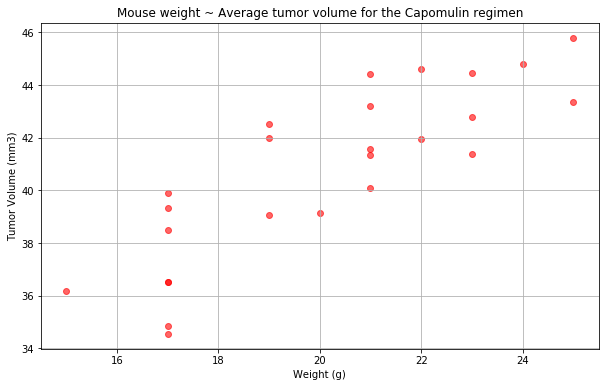

<Figure size 432x288 with 0 Axes>

In [15]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulinn_plot_scatter= mouse_study_Results[regimen]
capomulinn_plot_scatter.set_index(["Mouse ID","Weight (g)"], inplace=True)
capomulinn_plot_scatter = capomulinn_plot_scatter.groupby(["Mouse ID","Weight (g)"]).agg({"Tumor Volume (mm3)":"mean"})
capomulinn_plot_scatter =capomulinn_plot_scatter.reset_index()

#Get x and y axis data
x_axis = capomulinn_plot_scatter["Weight (g)"]
y_axis = capomulinn_plot_scatter["Tumor Volume (mm3)"]

#Preapre for scatter plot
colors = (0,0.1,0.5)
plt.figure(figsize=(10,6))
plt.scatter(x_axis,y_axis, alpha=0.6,color="red")

plt.title("Mouse weight ~ Average tumor volume for the Capomulin regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)
plt.show()
plt.tight_layout()

y = 0.95x + 21.55
The r-squared is: 0.7088568047708717
The correlation between mouse weight and the average tumor volume is 0.84


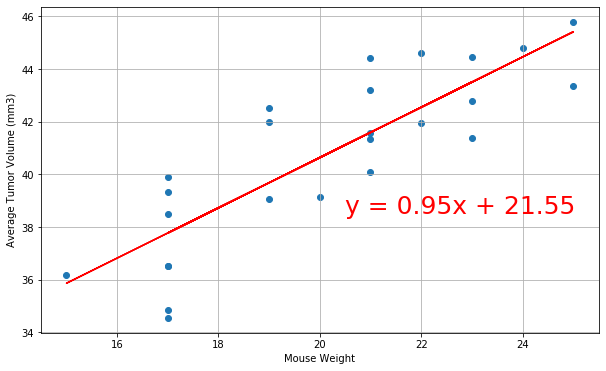

<Figure size 432x288 with 0 Axes>

In [16]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

#Get mouse weight and Average volume for the Capomulin regimen

#Set axis parameters
x_values = capomulinn_plot_scatter["Weight (g)"]
y_values = capomulinn_plot_scatter["Tumor Volume (mm3)"]

#Linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Linear regression equation
regress_values = x_values * slope + intercept

#Correleation calculation
correlation =st.pearsonr(x_values,y_values)

#Draw plot - not required
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10,6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,37), xytext=(25,40),fontsize=25,color="red",textcoords='offset points',)
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume (mm3)')
print(line_eq)
print(f"The r-squared is: {rvalue**2}")
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
plt.grid(True)

plt.show()
plt.tight_layout()